Test accuracy (digits dataset): 0.8259

Confusion matrix:
[[47  2  1  0  2  0  1  0  1  0]
 [ 0 41  0  2  2  2  2  3  3  0]
 [ 0  1 44  3  0  0  1  0  4  0]
 [ 0  0  0 48  0  0  0  0  3  4]
 [ 0  1  0  0 48  2  0  3  0  0]
 [ 0  2  0  2  2 47  0  1  0  1]
 [ 0  1  1  0  0  1 49  1  1  0]
 [ 0  1  0  0  0  1  0 47  4  1]
 [ 2  2  0  5  0  3  0  3 36  1]
 [ 0  0  1  5  3  0  0  2  4 39]]


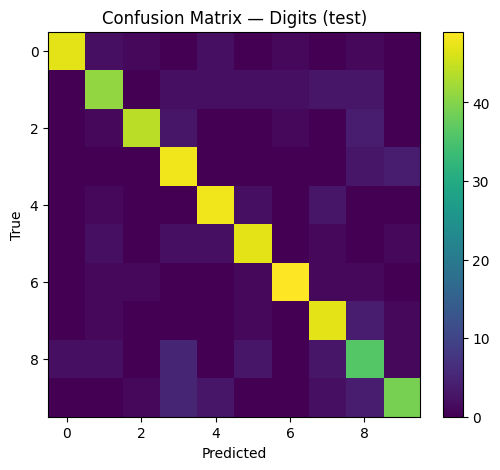

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

digits = load_digits()
X = digits.data
y = digits.target

# Scale features (simple scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Split 70/30
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test accuracy (digits dataset): {acc:.4f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6,5))
plt.imshow(cm, aspect='auto')
plt.title('Confusion Matrix — Digits (test)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar()
plt.show()